## Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

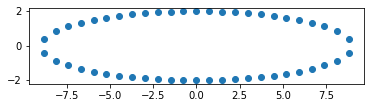

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [5]:
print(X)
print(Y)

[ 0.00000000e+00  7.44742410e-01  1.48935470e+00  2.23369584e+00
  2.97760060e+00  3.72086049e+00  4.46319267e+00  5.20418351e+00
  5.94317435e+00  6.67899598e+00  7.40922283e+00  8.12729576e+00
  8.80003723e+00  8.80003723e+00  8.12729576e+00  7.40922283e+00
  6.67899598e+00  5.94317435e+00  5.20418351e+00  4.46319267e+00
  3.72086049e+00  2.97760060e+00  2.23369584e+00  1.48935470e+00
  7.44742410e-01  1.10218212e-15 -7.44742410e-01 -1.48935470e+00
 -2.23369584e+00 -2.97760060e+00 -3.72086049e+00 -4.46319267e+00
 -5.20418351e+00 -5.94317435e+00 -6.67899598e+00 -7.40922283e+00
 -8.12729576e+00 -8.80003723e+00 -8.80003723e+00 -8.12729576e+00
 -7.40922283e+00 -6.67899598e+00 -5.94317435e+00 -5.20418351e+00
 -4.46319267e+00 -3.72086049e+00 -2.97760060e+00 -2.23369584e+00
 -1.48935470e+00 -7.44742410e-01]
[ 2.          1.99314081  1.972425    1.93742355  1.88737056  1.82107277
  1.73674751  1.63172973  1.50191119  1.34055475  1.13536674  0.85914295
  0.41924946 -0.41924946 -0.85914295 -1.

<pre>
<font face='georgia'>
<i>
1. Working the regression problem and how regularization helps to get rid of outliers.

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

6. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

7. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

8. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

9. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>
</pre>

[Text(0, 0.5, 'Regularization Strength: 100')]

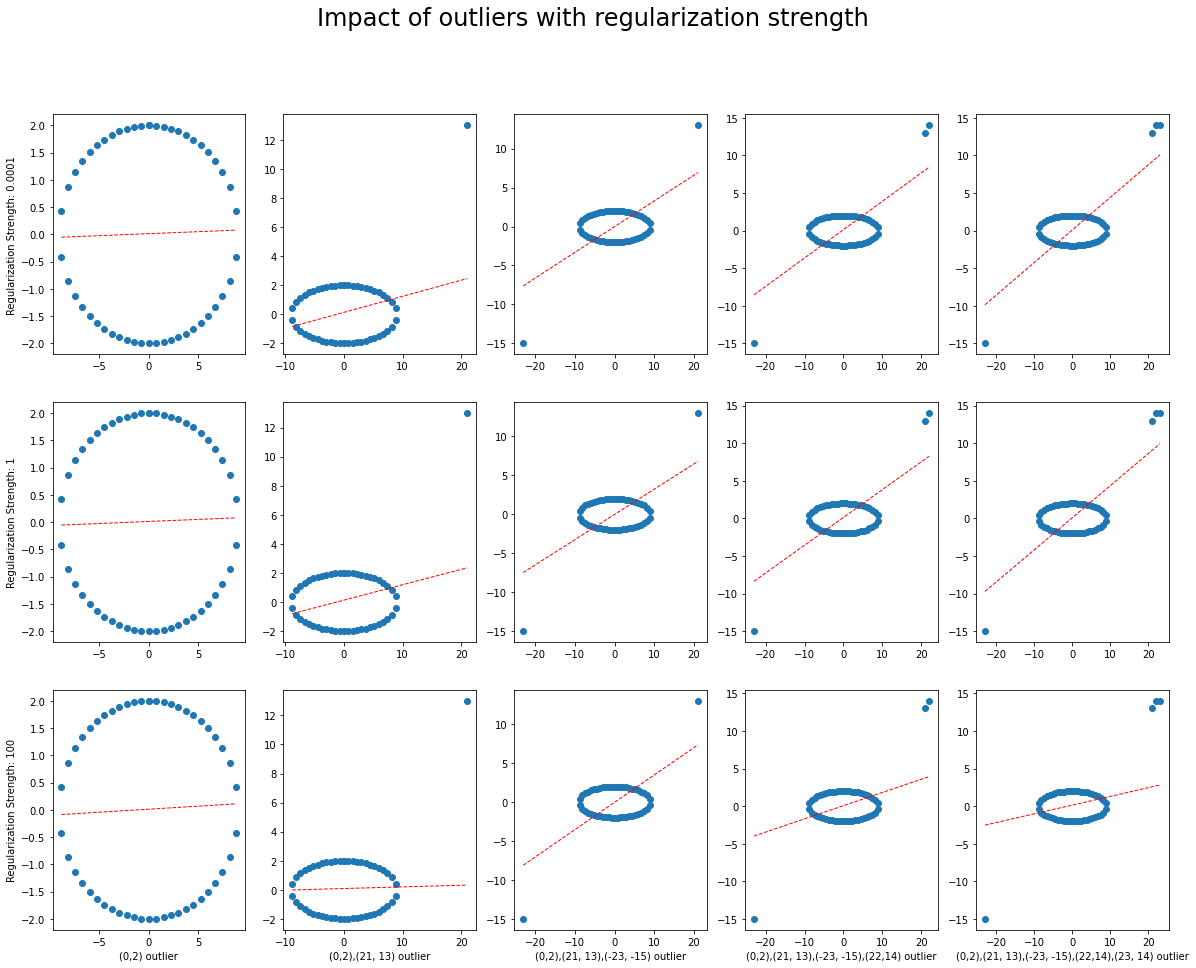

In [33]:
Alpha=[0.0001,1,100]
outlier=[(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] 
fig, a = plt.subplots(3,5,figsize=(20,15))
l,m=0,0
for i in Alpha:
    X_=X.copy()
    Y_=Y.copy()
    #print(X.shape,Y.shape)
    m=0
    for out in outlier:
        X_=np.append(X_,out[0])
        Y_=np.append(Y_,out[1])
        #print(X_.shape,Y_.shape)
        clf=SGDRegressor(alpha=i,eta0=0.001,learning_rate='constant',random_state=15,loss='squared_loss',penalty='l2')
        X_=X_.reshape(-1,1)
        Y_=Y_.reshape(-1,1)
        clf.fit(X_,Y_)
        a[l][m].scatter(X_,Y_)
        xd=np.array([min(X_),max(X_)])
        yd=clf.coef_[0]*xd+clf.intercept_
        a[l][m].plot(xd,yd,'r',lw=1,ls='--')
        m+=1
    l+=1
plt.suptitle('Impact of outliers with regularization strength',fontsize=24)
plt.setp(a[-1,0],xlabel='(0,2) outlier')
plt.setp(a[-1,1],xlabel='(0,2),(21, 13) outlier')
plt.setp(a[-1,2],xlabel='(0,2),(21, 13),(-23, -15) outlier')
plt.setp(a[-1,3],xlabel='(0,2),(21, 13),(-23, -15),(22,14) outlier')
plt.setp(a[-1,4],xlabel='(0,2),(21, 13),(-23, -15),(22,14),(23, 14) outlier')
plt.setp(a[0, 0], ylabel='Regularization Strength: 0.0001')
plt.setp(a[1, 0], ylabel='Regularization Strength: 1')
plt.setp(a[2, 0], ylabel='Regularization Strength: 100')

# Observations:

1. When there are no outliers, due to symmetric nature of points, we get horizontal line. 
2. As number of outliers increases, linear regression is trying to more fit these outliers. 
3. When regularization strength is less, impact of outliers is more.
4. As regularization strength increases, impact of outliers becomes less as we can see when alpha is 100, linear line is shifted little but when alpha is 0.0001, line is shifted more.